<a href="https://colab.research.google.com/github/uervitonsantos/Exercicios_Metodos_Quantitativos/blob/main/Exercicios_Metodos_Quantitativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rpy2==3.5.4

In [3]:
%load_ext rpy2.ipython

##1 - Para os exercícios a seguir avalie os pressupostos do modelo ANOVA.

(a) - Um restaurante oferece um molho
especial que acompanha um peixe.
A maioria dos clientes regulares é
composta por alunos, funcionários e
executivos. Alguns clientes pedem o
molho especial, mas o dono do
restaurante acredita que os alunos e
os funcionários gostam mais do
molho especial do que os
executivos. Considerando 13 dias
representativos para cada grupo,
existe nesse caso alguma relação
significativa? Use α = 5%.

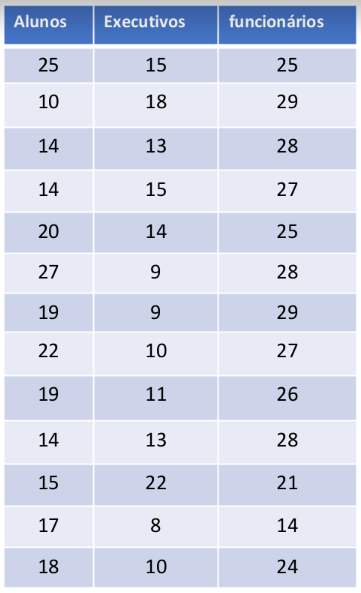

In [ ]:
%%R
install.packages("tidyverse")

In [ ]:
%%R
library(dplyr)
library(tidyverse)
library(tidyr)
library(ggplot2)

In [6]:
%%R
Alunos <- c(25, 10, 14, 14, 20, 27, 19, 22, 19, 14, 15, 17, 18)
Executivos <- c(15, 18, 13, 15, 14, 9, 9, 10,11, 13, 22, 8, 10)
Funcionários <- c( 25, 29, 28, 27, 25, 28, 29, 27, 26, 28, 21, 14, 24)

clientes <- data.frame(Alunos, Executivos, Funcionários)
clientes

   Alunos Executivos Funcionários
1      25         15           25
2      10         18           29
3      14         13           28
4      14         15           27
5      20         14           25
6      27          9           28
7      19          9           29
8      22         10           27
9      19         11           26
10     14         13           28
11     15         22           21
12     17          8           14
13     18         10           24


In [7]:
%%R
clie <- clientes %>% pivot_longer(cols = everything(), names_to = "cliente")
clie

# A tibble: 39 × 2
   cliente      value
   <chr>        <dbl>
 1 Alunos          25
 2 Executivos      15
 3 Funcionários    25
 4 Alunos          10
 5 Executivos      18
 6 Funcionários    29
 7 Alunos          14
 8 Executivos      13
 9 Funcionários    28
10 Alunos          14
# … with 29 more rows
# ℹ Use `print(n = ...)` to see more rows


In [8]:
# Análise de Variância
%%R
anova_cliente <- aov(value ~ cliente, data = clie)
anova_cliente

Call:
   aov(formula = value ~ cliente, data = clie)

Terms:
                  cliente Residuals
Sum of Squares  1046.0000  670.9231
Deg. of Freedom         2        36

Residual standard error: 4.31703
Estimated effects may be unbalanced


In [9]:
%%R
summary(anova_cliente)

            Df Sum Sq Mean Sq F value   Pr(>F)    
cliente      2 1046.0   523.0   28.06 4.51e-08 ***
Residuals   36  670.9    18.6                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [10]:
%%R
TUKEY <- TukeyHSD(anova_cliente, "cliente", ordered = TRUE)
TUKEY

  Tukey multiple comparisons of means
    95% family-wise confidence level
    factor levels have been ordered

Fit: aov(formula = value ~ cliente, data = clie)

$cliente
                             diff      lwr       upr     p adj
Alunos-Executivos        5.153846 1.014970  9.292722 0.0118142
Funcionários-Executivos 12.615385 8.476508 16.754261 0.0000000
Funcionários-Alunos      7.461538 3.322662 11.600415 0.0002618



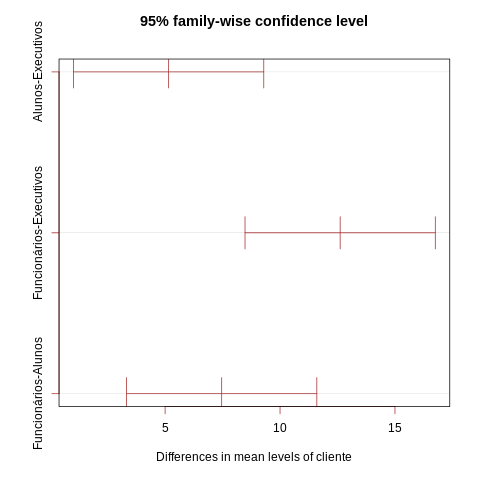

In [11]:
%%R
plot(TUKEY, col="brown")

(b) - Uma empresa coletou dados
sobre a quantidade de sacos
de arroz produzidos em três
regiões durante quinze dias.
Ela deseja verificar se
existem diferenças entre as
regiões, segundo as
quantidades de sacos de
arroz produzidos por região
apresentadas na tabela ao
lado. Use 95% de confiança.

In [13]:
%%R
Dias <- c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)
Região_A <- c(500,300,230,569,323,456,620,541,234,756,335,563,235,120,414)
Região_B <- c(234,435,670,231,435,523,478,388,456,890,427,345,234,650,470)
Região_C <- c(345,234,567,452,234,451,330,543,224,355,544,337,245,342,467)

regiao <- data.frame(Região_A, Região_B, Região_C)
regiao

   Região_A Região_B Região_C
1       500      234      345
2       300      435      234
3       230      670      567
4       569      231      452
5       323      435      234
6       456      523      451
7       620      478      330
8       541      388      543
9       234      456      224
10      756      890      355
11      335      427      544
12      563      345      337
13      235      234      245
14      120      650      342
15      414      470      467


In [14]:
%%R
regiao <- regiao %>% pivot_longer(cols = everything(), names_to = "regiao")
regiao

# A tibble: 45 × 2
   regiao   value
   <chr>    <dbl>
 1 Região_A   500
 2 Região_B   234
 3 Região_C   345
 4 Região_A   300
 5 Região_B   435
 6 Região_C   234
 7 Região_A   230
 8 Região_B   670
 9 Região_C   567
10 Região_A   569
# … with 35 more rows
# ℹ Use `print(n = ...)` to see more rows


In [17]:
# Análise de Variância
%%R
anova_regiao <- aov(value ~ regiao, data = regiao)
anova_regiao

Call:
   aov(formula = value ~ regiao, data = regiao)

Terms:
                   regiao Residuals
Sum of Squares    47910.9 1086929.9
Deg. of Freedom         2        42

Residual standard error: 160.8704
Estimated effects may be unbalanced


In [19]:
%%R
summary(anova_regiao)

            Df  Sum Sq Mean Sq F value Pr(>F)
regiao       2   47911   23955   0.926  0.404
Residuals   42 1086930   25879               


In [20]:
%%R
TUKEY <- TukeyHSD(anova_regiao, "regiao", ordered = TRUE)
TUKEY

  Tukey multiple comparisons of means
    95% family-wise confidence level
    factor levels have been ordered

Fit: aov(formula = value ~ regiao, data = regiao)

$regiao
                      diff        lwr      upr     p adj
Região_A-Região_C 35.06667 -107.64559 177.7789 0.8224967
Região_B-Região_C 79.73333  -62.97892 222.4456 0.3722098
Região_B-Região_A 44.66667  -98.04559 187.3789 0.7290677



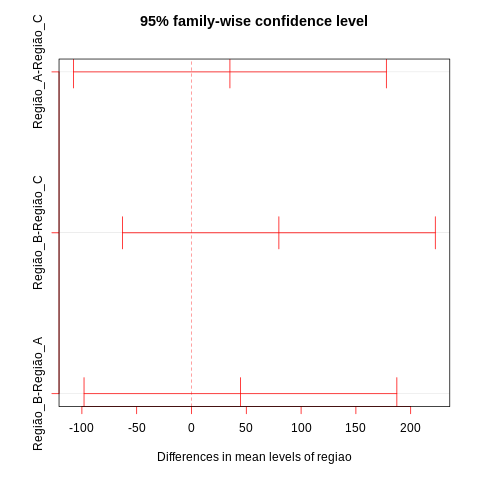

In [23]:
%%R
plot(TUKEY, col="red")